# 오토인코더를 이용한 이미지 생성

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#MNIST데이터 셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [3]:
#생성자 모델을 만듭니다.
autoencoder = Sequential()

In [4]:
# 인코딩 부분입니다. 입력 층보다 적은 수의 노드를 가진 은닉층을 중간에 넣어 줌으로써 차원을 줄여줍니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [5]:
# 디코딩 부분입니다. 입력노드와 같은 크기의 출력 노드를 만듭니다.
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) 
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [6]:
# 전체 구조를 확인해 봅니다.
autoencoder.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [8]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 51s 858us/sample - loss: 0.1609 - val_loss: 0.1287
Epoch 2/10
60000/60000 [==============================] - 51s 854us/sample - loss: 0.1211 - val_loss: 0.1137
Epoch 3/10
60000/60000 [==============================] - 51s 858us/sample - loss: 0.1117 - val_loss: 0.1075
Epoch 4/10
60000/60000 [==============================] - 53s 877us/sample - loss: 0.1069 - val_loss: 0.1037
Epoch 5/10
60000/60000 [==============================] - 52s 864us/sample - loss: 0.1037 - val_loss: 0.1011
Epoch 6/10
60000/60000 [==============================] - 52s 869us/sample - loss: 0.1013 - val_loss: 0.0990
Epoch 7/10
60000/60000 [==============================] - 51s 844us/sample - loss: 0.0994 - val_loss: 0.0973
Epoch 8/10
60000/60000 [==============================] - 50s 834us/sample - loss: 0.0981 - val_loss: 0.0963
Epoch 9/10
60000/60000 [==============================] - 52s 867us/sample - l

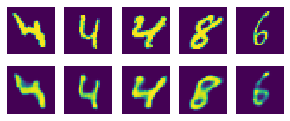

In [9]:
#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
    ax.axis('off')
plt.show()